# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import model_selection
# Read and preprocess the test data
with open('/content/stsa-test.txt', 'r') as file:
    test_data = file.readlines()

# Read and preprocess the training data
with open('/content/stsa-train.txt', 'r') as file:
    train_data = file.readlines()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def  text_splitter(x):
  x = x.split(" ")
  return x[0], x[1:]
train = pd.DataFrame(columns= ['text', 'target'])
test = pd.DataFrame(columns= ['text', 'target'])
with open('stsa-train.txt') as f:
  for i in f.readlines():
    target, text = text_splitter(i)
    train.loc[len(train.index)] = [text, target]

with open('stsa-test.txt') as f:
  for i in f.readlines():
    target, text = text_splitter(i)
    test.loc[len(test.index)] = [text, target]

In [ ]:
stop_word = stopwords.words('english')
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(texts):
  without_punt = []
  without_stop_w = []
  for text in texts:
    text = text.strip()
    text = text.lower()
    if text not in string.punctuation:
      without_punt.append(text)
    if text not in stop_word:
      without_stop_w.append(text)
  without_num = []
  for word in without_stop_w:
      if word.isdigit():
          continue
      if word.isalnum():
          word = list(word)
          words = [i for i in word if i not in p]
          word = ''.join(words)
          without_num.append(word)
      else:
          without_num.append(word)
  without_len1_2 = [word for word in without_num if len(word) >=3]
  return without_len1_2

In [ ]:
train['text'] = train['text'].apply(text_manipulation)
test['text'] = test['text'].apply(text_manipulation)

In [ ]:
c = Counter()
for text in train['text']:
  for word in text:
    c[word] += 1
print(c)

Counter({'film': 956, 'movie': 808, "n't": 535, '...': 525, 'one': 446, 'like': 413, 'story': 289, '-rrb-': 287, '-lrb-': 286, 'even': 221, 'good': 214, 'comedy': 212, 'much': 209, 'characters': 199, 'time': 188, 'funny': 181, 'little': 174, 'way': 167, 'never': 158, 'director': 157, 'make': 157, 'work': 152, 'would': 149, 'bad': 149, 'makes': 149, 'love': 145, 'enough': 143, 'may': 138, 'life': 136, 'best': 131, 'movies': 131, 'could': 127, 'new': 126, 'drama': 123, 'something': 120, 'well': 117, 'made': 117, 'really': 117, 'performances': 111, 'many': 109, 'plot': 109, 'nothing': 109, 'films': 108, 'better': 108, 'action': 108, 'without': 107, 'every': 106, 'people': 103, 'two': 100, 'see': 99, 'look': 99, 'ever': 98, "'re": 97, 'cast': 96, 'still': 94, 'humor': 94, 'also': 94, 'great': 94, 'sense': 91, 'script': 91, 'fun': 89, 'long': 89, 'audience': 88, 'often': 88, 'character': 87, 'feel': 86, 'might': 86, 'first': 85, 'kind': 84, 'performance': 83, 'big': 83, 'seems': 83, 'world'

In [ ]:
print(len(c))

14474


In [ ]:
top_100_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_100_voc = {k:c[k] for k in list(top_100_voc.keys())[:100]}

In [ ]:
features = list(top_100_voc.keys())
features

['film',
 'movie',
 "n't",
 '...',
 'one',
 'like',
 'story',
 '-rrb-',
 '-lrb-',
 'even',
 'good',
 'comedy',
 'much',
 'characters',
 'time',
 'funny',
 'little',
 'way',
 'never',
 'director',
 'make',
 'work',
 'would',
 'bad',
 'makes',
 'love',
 'enough',
 'may',
 'life',
 'best',
 'movies',
 'could',
 'new',
 'drama',
 'something',
 'well',
 'made',
 'really',
 'performances',
 'many',
 'plot',
 'nothing',
 'films',
 'better',
 'action',
 'without',
 'every',
 'people',
 'two',
 'see',
 'look',
 'ever',
 "'re",
 'cast',
 'still',
 'humor',
 'also',
 'great',
 'sense',
 'script',
 'fun',
 'long',
 'audience',
 'often',
 'character',
 'feel',
 'might',
 'first',
 'kind',
 'performance',
 'big',
 'seems',
 'world',
 'get',
 'real',
 'feels',
 'though',
 'minutes',
 'entertaining',
 'tale',
 'another',
 "'ve",
 'hard',
 'documentary',
 'thing',
 'hollywood',
 'thriller',
 'less',
 'take',
 'screen',
 'watching',
 'heart',
 'comes',
 'almost',
 'acting',
 'family',
 'picture',
 'quit

In [ ]:
df_train = pd.DataFrame(columns = features)
df_test = pd.DataFrame(columns = features)
def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix
for col, row in train.iterrows():
  w_list = term_document_matrix(row['text'])
  df_train.loc[len(df_train.index)] = w_list
df_train['Target'] = train['target']
df_train
for col, row in test.iterrows():
  w_list = term_document_matrix(row['text'])
  df_test.loc[len(df_test.index)] = w_list
df_test['Target'] = test['target']
df_test

<ipython-input-12-83cd11c244c7>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['Target'] = train['target']
<ipython-input-12-83cd11c244c7>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['Target'] = test['target']


,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,heart,comes,almost,acting,family,picture,quite,end,far,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#MULTINOMIAL NB
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
mul_nav_model = MultinomialNB()
#cross validation
cs  = model_selection.cross_val_score(mul_nav_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)
pred = mul_nav_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.63718412 0.60469314 0.65523466 0.64981949 0.59386282 0.65703971
 0.61844485 0.64014467 0.63110307 0.63110307]
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       912
           1       0.61      0.76      0.67       909

    accuracy                           0.63      1821
   macro avg       0.64      0.63      0.63      1821
weighted avg       0.64      0.63      0.63      1821



In [ ]:
#SVM
from sklearn import svm
svm_model = svm.SVC()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(svm_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
svm_model.fit(x,y)
pred = svm_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.62093863 0.63357401 0.63176895 0.63357401 0.63718412 0.63718412
 0.63471971 0.60940325 0.61121157 0.59674503]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       912
           1       0.59      0.77      0.67       909

    accuracy                           0.62      1821
   macro avg       0.63      0.62      0.61      1821
weighted avg       0.63      0.62      0.61      1821



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(knn_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
knn_model.fit(x,y)
pred = knn_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.57761733 0.57039711 0.57942238 0.51624549 0.58844765 0.58483755
 0.57866184 0.59855335 0.58951175 0.57866184]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       912
           1       0.59      0.52      0.55       909

    accuracy                           0.58      1821
   macro avg       0.58      0.58      0.58      1821
weighted avg       0.58      0.58      0.58      1821



In [ ]:
#DecisionTree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(tree_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
tree_model.fit(x,y)
pred = tree_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))


[0.57039711 0.57942238 0.59205776 0.62093863 0.53429603 0.58122744
 0.57685353 0.6039783  0.59312839 0.58047016]
              precision    recall  f1-score   support

           0       0.58      0.48      0.53       912
           1       0.55      0.64      0.60       909

    accuracy                           0.56      1821
   macro avg       0.57      0.56      0.56      1821
weighted avg       0.57      0.56      0.56      1821



In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(forest_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
forest_model.fit(x,y)
pred = forest_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))


[0.61732852 0.60288809 0.57400722 0.60108303 0.6299639  0.61371841
 0.58951175 0.58227848 0.60759494 0.62748644]
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       912
           1       0.57      0.69      0.63       909

    accuracy                           0.59      1821
   macro avg       0.59      0.59      0.58      1821
weighted avg       0.59      0.59      0.58      1821



In [ ]:
#XGBoost
from xgboost import XGBClassifier
bst_model = XGBClassifier()
def string_ch(x):
  return int(x)
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target'].apply(string_ch)
cs  = model_selection.cross_val_score(bst_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target'].apply(string_ch)
bst_model.fit(x,y)
pred = bst_model.predict(df_test[features])
print(classification_report(df_test['Target'].apply(string_ch), pred))

[0.59205776 0.58844765 0.61371841 0.62093863 0.67870036 0.6299639
 0.63833635 0.66184448 0.60940325 0.63110307]
              precision    recall  f1-score   support

           0       0.66      0.48      0.55       912
           1       0.59      0.75      0.66       909

    accuracy                           0.62      1821
   macro avg       0.63      0.62      0.61      1821
weighted avg       0.63      0.62      0.61      1821



In [ ]:
#Word2Vec
from gensim.models import Word2Vec
t_df = pd.concat([train, test])
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)
word2vec.build_vocab([i for i in t_df['text']])
words = set(word2vec.wv.index_to_key )
import numpy as np
k = list()
for ls in t_df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))
final = list()
for i in k:
  final.append(np.array(i))
final_1 = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)
p = pd.DataFrame(final_1)
p
t_df = t_df.reset_index()
p['target'] = t_df['target']
mul_nav_model = MultinomialNB()
f = list(p.columns)
f.remove('target')
f
tr, tes  = train_test_split(p, test_size=0.2)
x = p[f]
y = p['target']
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)
pred = mul_nav_model.predict(x)
print(classification_report(df_train['Target'], pred))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      3310
           1       0.63      0.76      0.69      3610

    accuracy                           0.64      6920
   macro avg       0.65      0.64      0.63      6920
weighted avg       0.65      0.64      0.64      6920



In [ ]:
#BERT
!pip install simpletransformers
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score
cuda_available = torch.cuda.is_available()
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "use_early_stopping" : 0,
             "num_train_epochs": 5}

model = ClassificationModel(
    "bert", 'bert-base-uncased',
    num_labels=2,
    args=train_args,
     use_cuda=cuda_available
)
train['target'] = train['target'].apply(string_ch)
model.train_model(train)
test
result, model_outputs, wrong_predictions = model.eval_model(test, acc=accuracy_score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able

NameError: name 'train' is not defined

IndentationError: unexpected indent (<ipython-input-15-d2d7beb9d33a>, line 2)

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870:

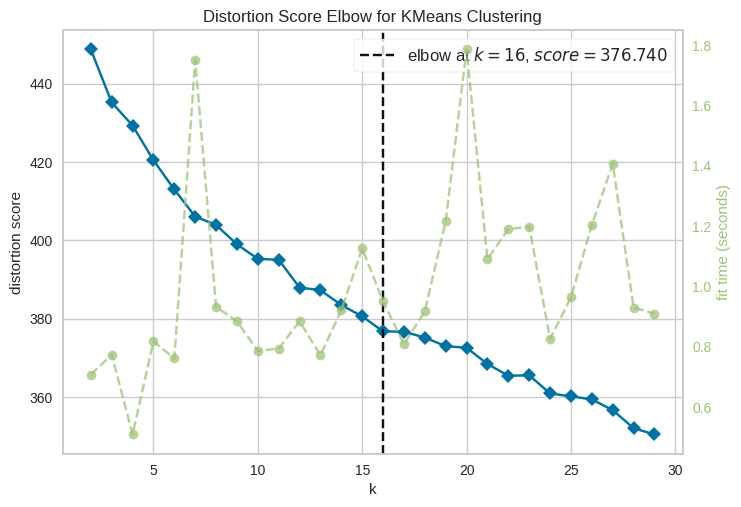

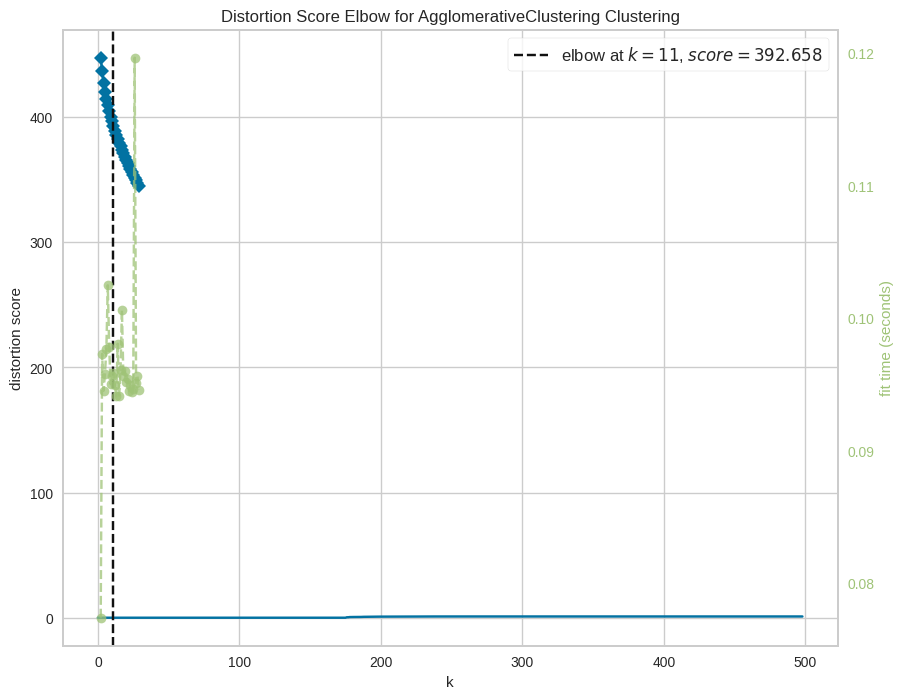

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

     KMeans_Cluster  DBSCAN_Cluster  Hierarchical_Cluster  Word2Vec_Cluster  \
0                 7              -1                     4                 1   
1                 7              -1                     1                 1   
2                 9               0                     0                 2   
3                 9              -1                     1                 3   
4                 1              -1                     4                 1   
..              ...             ...                   ...               ...   
494              10               0                     7                 6   
495               7               0                     1                 5   
496               7              -1                     4                 3   
497               1               0                     4                 1   
498               0               0                     3                 1   

     BERT_Cluster  
0               3  
1          

In [ ]:
!pip install sentence-transformers
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from yellowbrick.cluster import KElbowVisualizer

# Load dataset
data = pd.read_csv("Amazon_Unlocked_Mobile_data.csv")

# Preprocessing
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def text_preprocessing(text):
    tokens = nltk.word_tokenize(text.lower()) # Tokenization and convert to lowercase
    tokens = [token for token in tokens if token not in punctuation] # Remove punctuation
    tokens = [token for token in tokens if token not in stop_words] # Remove stop words
    return tokens

data['Review Votes'] = data['Reviews'].apply(text_preprocessing)

# K-means clustering
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Reviews'])

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30), timings= True)
visualizer.fit(X.toarray())

visualizer.show()

kmeans = KMeans(init='k-means++', n_clusters=11, n_init=100, random_state=0)
kmeans.fit(X)
data['KMeans_Cluster'] = kmeans.labels_

# DBSCAN clustering
nn = NearestNeighbors(n_neighbors=20).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

eps = 1
dbscan = DBSCAN(eps=eps)
dbscan.fit(X)
data['DBSCAN_Cluster'] = dbscan.labels_

# Hierarchical clustering
visualizer = KElbowVisualizer(AgglomerativeClustering(), k=(2,30), timings= True)
visualizer.fit(X.toarray())
visualizer.show()

hierarchical_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(X.toarray())
data['Hierarchical_Cluster'] = hierarchical_cluster.labels_

# Word2Vec clustering
word2vec_model = Word2Vec(data['Review Votes'], vector_size=100, min_count=1, sg=1)
word_vectors = word2vec_model.wv

X_word2vec = []
for text in data['Review Votes']:
    vec = np.zeros(100)
    count = 0
    for word in text:
        if word in word_vectors:
            vec += word_vectors[word]
            count += 1
    if count != 0:
        vec /= count
    X_word2vec.append(vec)

kmeans_word2vec = KMeans(init='k-means++', n_clusters=11, n_init=100, random_state=0)
kmeans_word2vec.fit(X_word2vec)
data['Word2Vec_Cluster'] = kmeans_word2vec.labels_

# BERT clustering
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
X_bert = embedder.encode(data['Reviews'])

kmeans_bert = KMeans(init='k-means++', n_clusters=10, n_init=100, random_state=0)
kmeans_bert.fit(X_bert)
data['BERT_Cluster'] = kmeans_bert.labels_

# Comparison of results
print(data[['KMeans_Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster', 'Word2Vec_Cluster', 'BERT_Cluster']])

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means clustering calculates the distances between data points and cluster centroids. DBSCAN, on the other hand, is concerned with density-based clustering, which identifies heavy areas with points while differentiating them from empty places. Hierarchical clustering works in stages, first considering each point as a cluster and then gradually merging clusters based on closeness until a hierarchical structure forms.

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here: It is challenging to run the BERT Model as it is taking longer time than expected compared to the all the other algorithms.
It is very challenging to visualize the clusterings




'''